In [1]:
#Visualising the pollynomial regression model results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline
#Lectura de Datos
df =pd.read_csv("WHO-COVID-19-global-data.csv",sep=",")

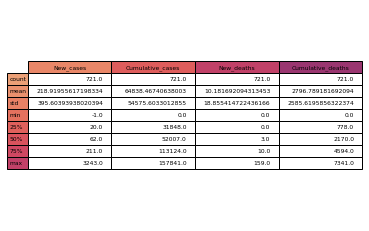

In [2]:
import seaborn as sns
datita = df.loc[df['Country'] == 'Afghanistan']
tablita =datita.describe()

fig,ax = plt.subplots(1,1)
cm = sns.color_palette("flare",15)
cm2 = sns.color_palette("flare",5)
pd.plotting.table(ax,tablita, rowColours=cm, colLabels=tablita.columns, colColours=cm2, loc='center')
ax.axis('off')
plt.show()


In [87]:
datita['Date_reported'] = datita['Date_reported'].astype('category').cat.codes
posx = datita.columns.get_loc('Date_reported')
posy= datita.columns.get_loc('New_cases')
x = datita.iloc[:,posx].values.reshape(-1,1)
y = datita.iloc[:,posy].values
temporal = np.arange(0,len(x)+ 10)
x_1 = temporal.reshape((-1, 1))

C:\Users\HEIDYC~1\AppData\Local\Temp/ipykernel_10028/3653455460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datita['Date_reported'] = datita['Date_reported'].astype('category').cat.codes


In [88]:
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(x)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

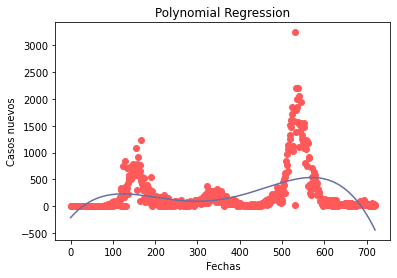

In [89]:
#Visualising the pollynomial regression model results
plt.scatter(x,y,color='#FF5959')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color='#676FA3')
plt.title('Polynomial Regression')
plt.xlabel('Fechas')
plt.ylabel('Casos nuevos')
plt.show()

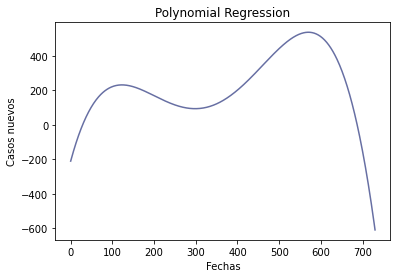

In [91]:
#Visualising the pollynomial regression model results
#plt.scatter(x_1,y,color='#FF5959')
plt.plot(x_1,lin_reg2.predict(poly_reg.fit_transform(x_1)),color='#676FA3')
plt.title('Polynomial Regression')
plt.xlabel('Fechas')
plt.ylabel('Casos nuevos')
plt.show()

In [23]:
lin_reg2.predict(poly_reg.fit_transform([x[-1]+69]))

array([-2013.55712983])

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

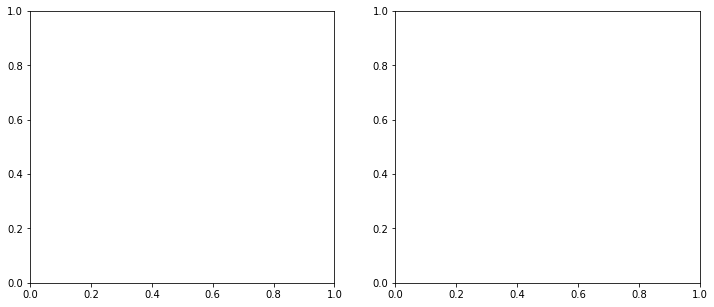

In [15]:
#Diagrama caja de bigotes, los cuales indican los outlayers
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, 2, figsize=(12,5))
for i, ax in enumerate(axs.flat):
    i=i+1
    ax.boxplot(datita.iloc[:,i], flierprops=red_circle, notch=True, meanline=True, showmeans=True)
    ax.set_title(datita.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()
#fig, ax = plt.subplots(figsize=(12,5))
#boxplot = datita.plot.box(return_type='axes', vert=True,figsize=(12,5))



Text(0.5, 1.0, 'Correlation and Heatmap')

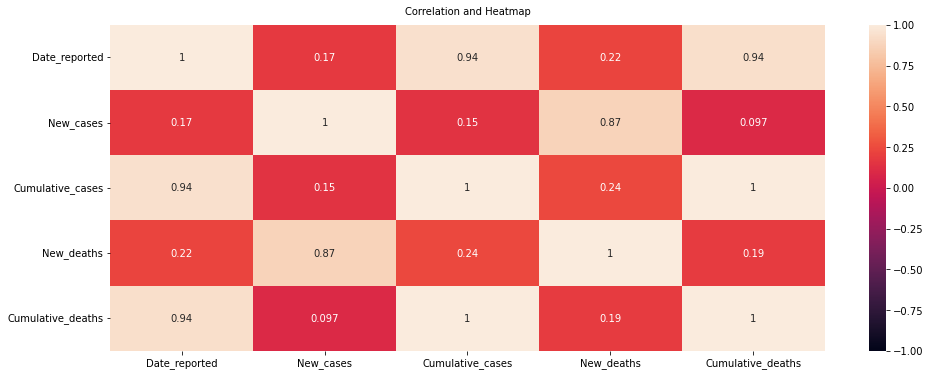

In [9]:
#Se podria decir que se pueden relacionar arriba del 50%
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(datita.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation and Heatmap', fontdict={'fontsize':10}, pad=10)
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [10]:
def poly_reg(degrees, x_test, y_test):
    features = PolynomialFeatures(degree=degrees)
    x_test_transformed = features.fit_transform(x_test)
    model = LinearRegression()
    model.fit(x_test_transformed,y_test)
    test_pred = model.predict(x_test_transformed)
    rmse_poly = mean_squared_error(y_test, test_pred, squared = False)

    return [rmse_poly]

In [11]:
errors = []

for i in range(26):
    errors.append([i] + poly_reg(i, x, y))
    
df2 = pd.DataFrame(errors, columns = ['degree','data'])

C:\Users\HEIDYC~1\AppData\Local\Temp/ipykernel_12500/2584635226.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df2['degree'], df2['data'], 'o-r', label = 'Data',color='#676FA3')


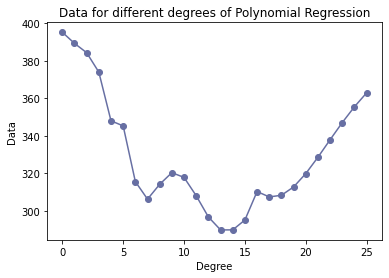

In [12]:
plt.plot(df2['degree'], df2['data'], 'o-r', label = 'Data',color='#676FA3')
plt.xlabel('Degree')
plt.ylabel('Data')
plt.title('Data for different degrees of Polynomial Regression')
plt.show()